## 实验目的
1. 分别收集尽量多的英语和汉语文本
2. 计算这些文本中英语字母和汉字的熵，对比本章课件第18页上表中给出的结果
3. 逐步扩大文本规模，分析多次增加之后熵的变化情况
4. 计算文本中中英文词汇的熵，并绘制不同文本规模的熵变化曲线

## 实验过程

### 爬取数据

#### 中文数据
运行以下命令：
```bash
cd xinhua-crawler
scrapy crawl news_spider -s OUTPUT_DIR="../data/cn" -a language="cn" -a start_keyword="1" -s CLOSESPIDER_ITEMCOUNT=50000
```

#### 英文数据
运行以下命令：
```bash
cd xinhua-crawler
scrapy crawl news_spider -s OUTPUT_DIR="../data/en" -a language="en" -a start_keyword="a" -s CLOSESPIDER_ITEMCOUNT=100000
```

### 数据分析

#### 计算信息熵

In [1]:
import json
from tqdm import tqdm
from utils.cleaning import keep_only_cnchr, keep_only_alpha
from utils.entropy import cal_entropy

batch_size = 10_000

with open("data/cn/data.json") as f:
    cn_news_list: list[str] = [news['content'] for news in tqdm(json.load(f), desc="Reading CN News")]

cn_chrs = ''
for i in tqdm(range(0, len(cn_news_list), batch_size), desc="Processing CN News"):
    batch = ''.join(cn_news_list[i:i+batch_size])
    cn_chrs += keep_only_cnchr(batch)
    
print(f"中文数据总字数为：{len(cn_chrs)}")
print(f"中文信息熵为：{cal_entropy(cn_chrs)}")

with open("data/en/data.json") as f:
    en_news_list: list[str] = [news['content'] for news in tqdm(json.load(f), desc="Reading EN News")]
    
en_chrs = ''
for i in tqdm(range(0, len(en_news_list), batch_size), desc="Processing EN News"):
    batch = ''.join(en_news_list[i:i+batch_size])
    en_chrs += keep_only_alpha(batch).lower()

print(f"英文数据总字母数为：{len(en_chrs)}")
print(f"英文信息熵为：{cal_entropy(en_chrs)}")

Processing CN News: 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]


中文数据总字数为：41403562
Counting data...


Calculating Entropy: 100%|██████████| 6386/6386 [00:00<00:00, 3258098.21it/s]


中文信息熵为：9.75360458234057


Processing EN News: 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


英文数据总字母数为：142729487
Counting data...


Calculating Entropy: 100%|██████████| 26/26 [00:00<00:00, 432745.65it/s]

英文信息熵为：4.182886843417005


#### 信息熵曲线
每次增加3M数据量，画出计算结果随数据量的变化。

Calculating Entropy Curve: 100%|██████████| 48/48 [00:06<00:00,  7.20it/s]


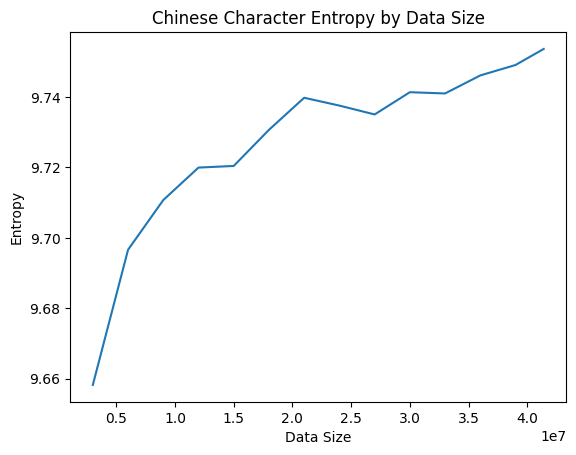

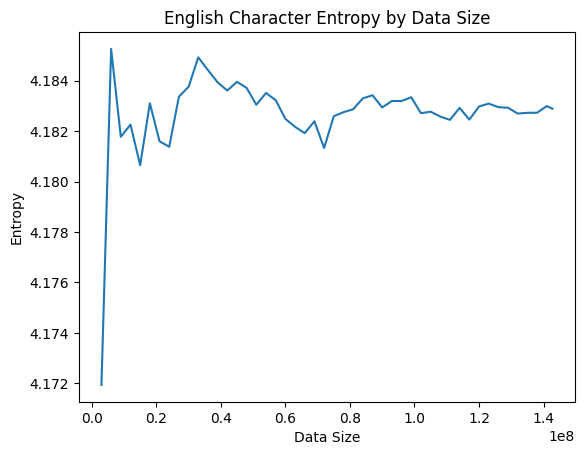

In [8]:
import matplotlib.pyplot as plt
from utils.entropy import entropy_curve

# 得到中英文数据的信息熵曲线
fig1 = entropy_curve(cn_chrs, 3_000_000)
fig2 = entropy_curve(en_chrs, 3_000_000)
plt.plot(fig1[0], fig1[1], label='CN')
plt.xlabel('Data Size')
plt.ylabel('Entropy')
plt.title('Chinese Character Entropy by Data Size')
plt.show()
plt.plot(fig2[0], fig2[1], label='EN')
plt.xlabel('Data Size')
plt.ylabel('Entropy')
plt.title('English Character Entropy by Data Size')
plt.show()

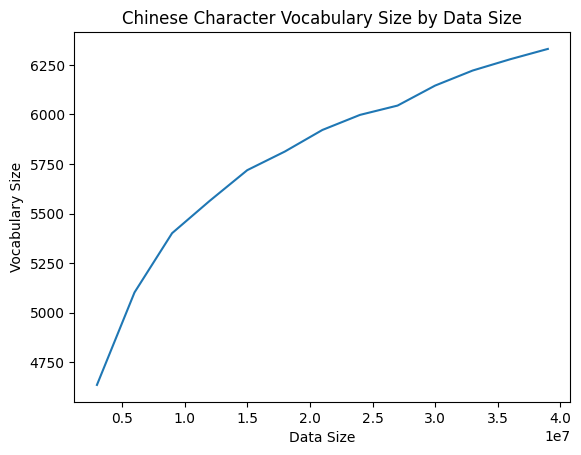

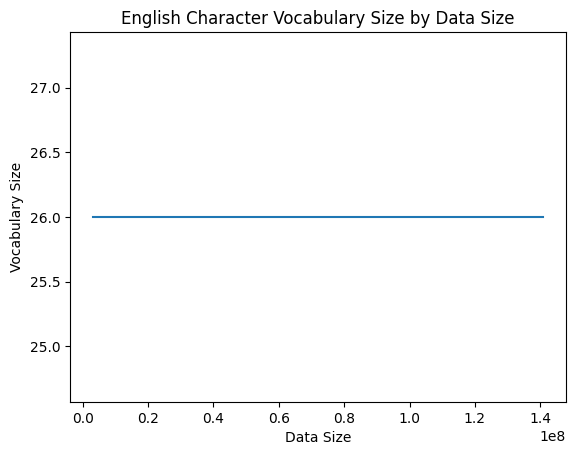

In [3]:
from utils.distribution import vocab_size_curve
import matplotlib.pyplot as plt

fig1 = vocab_size_curve(cn_chrs, 3_000_000)
fig2 = vocab_size_curve(en_chrs, 3_000_000)
plt.plot(fig1[0], fig1[1], label='CN')
plt.xlabel('Data Size')
plt.ylabel('Vocabulary Size')
plt.title('Chinese Character Vocabulary Size by Data Size')
plt.show()
plt.plot(fig2[0], fig2[1], label='EN')
plt.xlabel('Data Size')
plt.ylabel('Vocabulary Size')
plt.title('English Character Vocabulary Size by Data Size')
plt.show()

Counting...
Total Chinese Characters: 6386
Sorting...
Constructing Top 4000 Set...


Calculating Entropy Curve: 100%|██████████| 14/14 [00:04<00:00,  2.89it/s]


Constructing Top 5000 Set...


Calculating Entropy Curve: 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]


Constructing Top 6000 Set...


Calculating Entropy Curve: 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


Constructing Top 6386 Set...


Calculating Entropy Curve: 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]


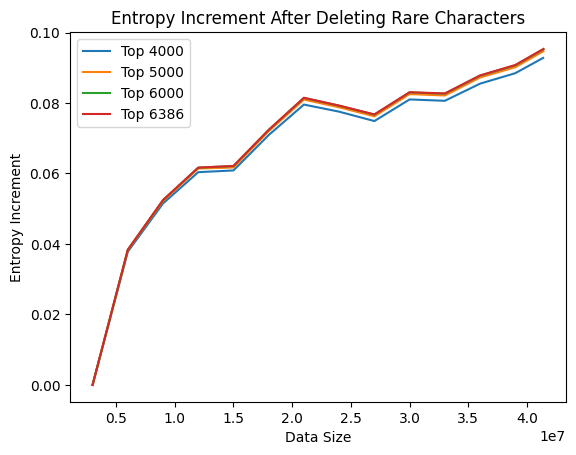

In [9]:
from collections import Counter
from utils.entropy import entropy_curve

print("Counting...")
counter = Counter(cn_chrs)
print(f"Total Chinese Characters: {len(counter)}")
print("Sorting...")
sorted_counter = sorted(counter.items(), key=lambda x: x[1], reverse=True)
sorted_chrs = [chr for chr, _ in sorted_counter]
for i in list(range(4_000, len(counter), 500)) + [len(counter)]:
    print(f"Constructing Top {i} Set...")
    top_set = set(sorted_chrs[:i])
    chrs = [chr for chr in tqdm(cn_chrs) if chr in top_set]
    fig = entropy_curve(chrs, 3_000_000)
    fig = list(fig)
    base = fig[1][0]
    fig[1] = [entropy-base for entropy in fig[1]]
    plt.plot(fig[0], fig[1], label=f'Top {i}')
plt.legend()
plt.xlabel("Data Size")
plt.ylabel("Entropy Increment")
plt.title("Entropy Increment After Deleting Rare Characters")
plt.show()

Counting...
Total Chinese Characters: 26
Sorting...
Constructing Top 22 Set...


Calculating Entropy Curve: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]


Constructing Top 23 Set...


Calculating Entropy Curve: 100%|██████████| 48/48 [00:05<00:00,  8.19it/s]


Constructing Top 24 Set...


Calculating Entropy Curve: 100%|██████████| 48/48 [00:06<00:00,  7.20it/s]


Constructing Top 25 Set...


Calculating Entropy Curve: 100%|██████████| 48/48 [00:07<00:00,  6.01it/s]


Constructing Top 26 Set...


Calculating Entropy Curve: 100%|██████████| 48/48 [00:06<00:00,  6.88it/s]


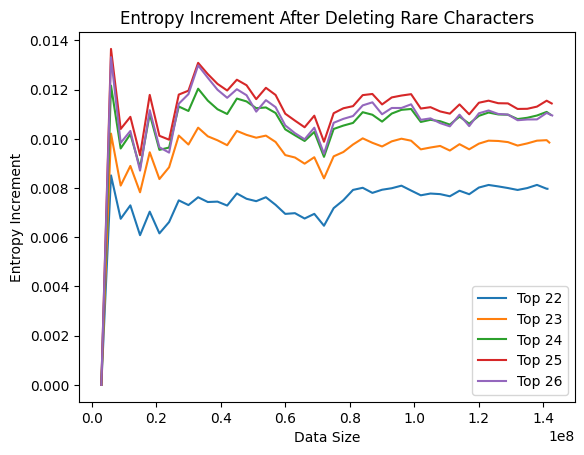

In [46]:
from collections import Counter
from utils.entropy import entropy_curve

print("Counting...")
counter = Counter(en_chrs)
print(f"Total Chinese Characters: {len(counter)}")
print("Sorting...")
sorted_counter = sorted(counter.items(), key=lambda x: x[1], reverse=True)
sorted_chrs = [chr for chr, _ in sorted_counter]
for i in [22, 23, 24, 25, 26]:
    print(f"Constructing Top {i} Set...")
    top_set = set(sorted_chrs[:i])
    chrs = [chr for chr in tqdm(en_chrs) if chr in top_set]
    fig = entropy_curve(chrs, 3_000_000)
    fig = list(fig)
    base = fig[1][0]
    fig[1] = [entropy-base for entropy in fig[1]]
    plt.plot(fig[0], fig[1], label=f'Top {i}')
plt.legend()
plt.xlabel("Data Size")
plt.ylabel("Entropy Increment")
plt.title("Entropy Increment After Deleting Rare Characters")
plt.show()

100%|██████████| 5/5 [00:07<00:00,  1.58s/it]


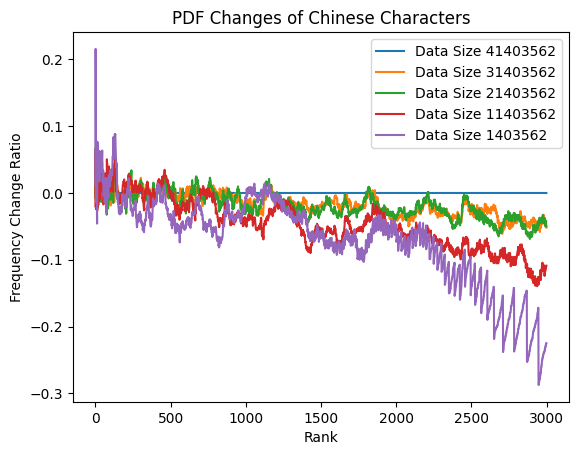

In [26]:
from utils.distribution import pdf_curve
import matplotlib.pyplot as plt
from tqdm import tqdm

bases = []
for size in tqdm(range(len(cn_chrs), 0, -10_000_000)):
    fig = pdf_curve(cn_chrs[:size], 0, 3000)
    fig = list(fig)
    if not bases:
        bases = fig[1]
    fig[1] = [(freq-base)/base for freq, base in zip(fig[1], bases)]
    plt.plot(fig[0], fig[1], label=f'Data Size {size}')
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Frequency Change Ratio")
plt.title("PDF Changes of Chinese Characters")
plt.show()

100%|██████████| 5/5 [00:14<00:00,  2.96s/it]


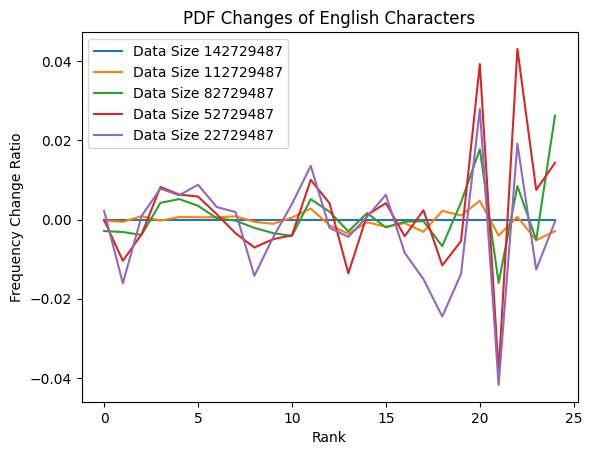

In [24]:
from utils.distribution import pdf_curve
import matplotlib.pyplot as plt
from tqdm import tqdm

bases = []
for size in tqdm(range(len(en_chrs), 0, -30_000_000)):
    fig = pdf_curve(en_chrs[:size], 0, 25)
    fig = list(fig)
    if not bases:
        bases = fig[1]
    fig[1] = [(freq-base)/base for freq, base in zip(fig[1], bases)]
    plt.plot(fig[0], fig[1], label=f'Data Size {size}')
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Frequency Change Ratio")
plt.title("PDF Changes of English Characters")
plt.show()

#### 词汇信息熵

In [5]:
import json
import os
from utils.tokenization import tokenize_cn, tokenize_en

if 'tokens.json' in os.listdir('data/cn'):
    with open('data/cn/tokens.json', 'r') as f:
        cn_tokens = json.load(f)
else:
    cn_tokenized_sentences = [token for news in tqdm(cn_news_list, desc='Tokenizing') for token in tokenize_cn(news, only_cnchr=True)]
    cn_tokens = [token for sentence in cn_tokenized_sentences for token in sentence]
    with open('data/cn/tokens.json', 'w') as f:
        json.dump(cn_tokens, f, ensure_ascii=False, indent=4)
print(f"中文数据总词数为：{len(cn_tokens)}")
print(f"中文词信息熵为：{cal_entropy(cn_tokens)}")

if 'tokens.json' in os.listdir('data/en'):
    with open('data/en/tokens.json', 'r') as f:
        en_tokens = json.load(f)
else:
    en_tokenized_sentences = [token for news in tqdm(en_news_list, desc='Tokenizing') for token in tokenize_en(news, only_alpha=True)]
    en_tokens = [token.lower() for sentence in en_tokenized_sentences for token in sentence]
    with open('data/en/tokens.json', 'w') as f:
        json.dump(en_tokens, f, ensure_ascii=False, indent=4)
print(f"英文数据总词数为：{len(en_tokens)}")
print(f"英文词信息熵为：{cal_entropy(en_tokens)}")

中文数据总词数为：21370005
Counting data...


Calculating Entropy: 100%|██████████| 274886/274886 [00:00<00:00, 3699733.82it/s]

中文词信息熵为：12.617820727547258


英文数据总词数为：27103051
Counting data...


Calculating Entropy: 100%|██████████| 133444/133444 [00:00<00:00, 3350842.96it/s]

英文词信息熵为：10.676914172183697


#### 词汇信息熵曲线

Calculating Entropy Curve: 100%|██████████| 55/55 [00:05<00:00,  9.31it/s]


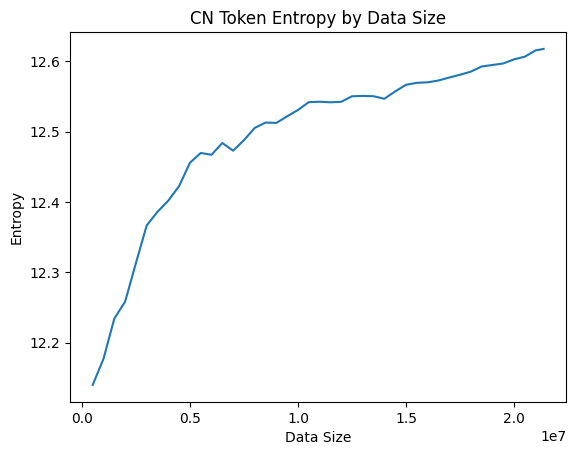

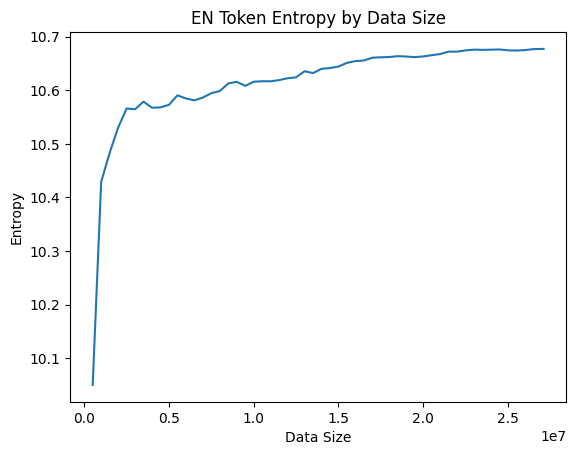

In [39]:
import matplotlib.pyplot as plt
from utils.entropy import entropy_curve

# 得到中英文数据的信息熵曲线
fig1 = entropy_curve(cn_tokens, 500_000)
fig2 = entropy_curve(en_tokens, 500_000)
plt.plot(fig1[0], fig1[1])
plt.xlabel('Data Size')
plt.ylabel('Entropy')
plt.title('CN Token Entropy by Data Size')
plt.show()
plt.plot(fig2[0], fig2[1])
plt.xlabel('Data Size')
plt.ylabel('Entropy')
plt.title('EN Token Entropy by Data Size')
plt.show()

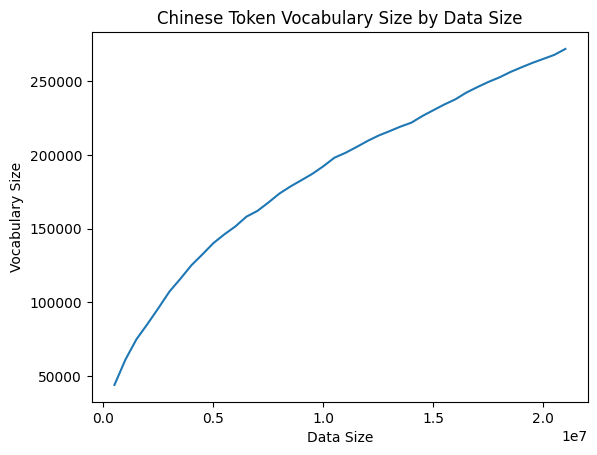

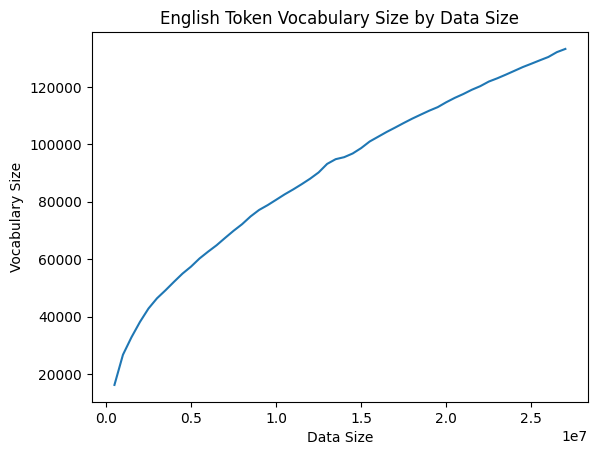

In [7]:
from utils.distribution import vocab_size_curve
import matplotlib.pyplot as plt

fig1 = vocab_size_curve(cn_tokens, 500_000)
fig2 = vocab_size_curve(en_tokens, 500_000)
plt.plot(fig1[0], fig1[1], label='CN')
plt.xlabel('Data Size')
plt.ylabel('Vocabulary Size')
plt.title('Chinese Token Vocabulary Size by Data Size')
plt.show()
plt.plot(fig2[0], fig2[1], label='EN')
plt.xlabel('Data Size')
plt.ylabel('Vocabulary Size')
plt.title('English Token Vocabulary Size by Data Size')
plt.show()